## Naive Bayes Implementation using Python

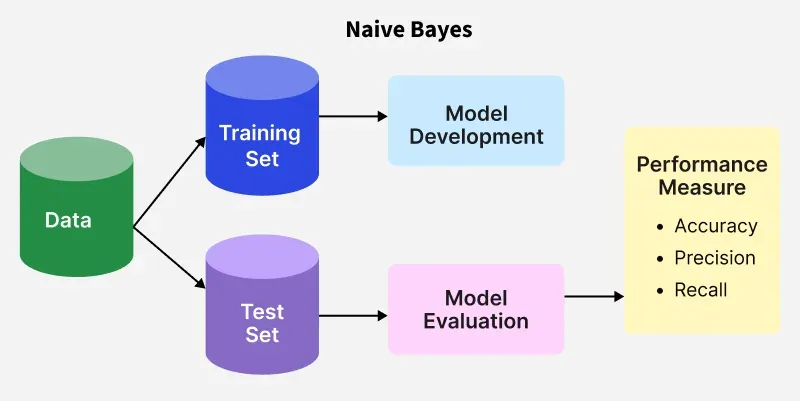

Naive Bayes is a probabilistic machine learning algorithms based on the Bayes Theorem. It is popular method for classification applications such as spam filtering and text classification.

### Importing necessary libraries:

In [18]:
import math 
import random
import pandas as pd
import numpy as np

### Encoding Class
The encode_class function converts class labels in the dataset into numeric values. It assigns a unique numeric identifier to each class.

In [19]:
def encode_class(data):
    classes = []
    for i in range(len(data)):
        if data[i][-1] not in classes:
            classes.append(data[i][-1])
    
    for i in range(len(classes)):
        for j in range(len(data)):
            if data[j][-1] == classes[i]:
                data[j][-1] = i
    return data

### Splitting the Data
The splitting function is used to split the dataset into training and testing sets based on the given ratio.

In [20]:
def splitting(data,ratio):
    train_num = int(len(data)*ratio)
    train = []
    test = list(data)

    while len(train) < train_num:
        index = random.randrange(len(test))
        train.append(test.pop(index))
    return train, test

### Grouping Data by Class
The groupUnderClass function takes the data and returns a dictionary where each key is a class label and the value is a list of data points belonging to that class.

In [21]:
def group_under_class(data):
    data_dict = {}
    for i in range(len(data)):
        if data[i][-1] not in data_dict:
            data_dict[data[i][-1]] = []
        data_dict[data[i][-1]].append(data[i])
    return data_dict

### Calculating Mean and Standard Deviation for Class
The **mean_std_dev** function takes a list of numbers and calculates the mean and standard deviation.
<br>
<br>

The **mean_std_dev_forClass** function takes the data and returns a dictionary where each key is a class label and the value is a list of lists, where each inner list contains the mean and standard deviation for each attribute of the class.

In [22]:
def mean_std_dev(numbers):
    avg = np.mean(numbers)
    std_dev = np.std(numbers)
    return avg, std_dev

def mean_std_dev_forClass(data):
    info = {}
    data_dict = group_under_class(data)
    for class_value, instances in data_dict.items():
        info[class_value] = [mean_std_dev(attribute) for attribute in zip(*instances)]
    
    return info

### Calculating Gaussian and Class Probabilities

The **calculateGaussianProbability** function takes a value, mean, and standard deviation and calculates the probability of the value occurring under a Gaussian distribution with that mean and standard deviation.
<br>
<br>

The **calculateClassProbabilities** function takes the information dictionary and a test data point as arguments. It iterates through each class and calculates the probability of the test data point belonging to that class based on the mean and standard deviation of each attribute for that class.

In [23]:
def calculateGaussianProbability(x, mean, stdev):
    epsilon = 1e-10
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev + epsilon, 2))))
    return (1 / (math.sqrt(2 * math.pi) * (stdev + epsilon))) * expo

def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

### Predicting for Test Set

The **predict** function takes the information dictionary and a test data point as arguments. It calculates the class probabilities and returns the class with the highest probability.
<br>
<br>

The **getPredictions** function takes the information dictionary and the test set as arguments. It iterates through each test data point and predicts its class using the predict function.

In [24]:
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel = max(probabilities, key=probabilities.get)
    return bestLabel

def getPredictions(info, test):
    predictions = [predict(info, instance) for instance in test]
    return predictions

### Calculating Accuracy

The **accuracy_rate** function takes the test set and the predictions as arguments. It compares the predicted classes with the actual classes and calculates the percentage of correctly predicted data points.

In [25]:
def accuracy_rate(test, predictions):
    correct = sum(1 for i in range(len(test)) if test[i][-1] == predictions[i])
    return (correct / float(len(test))) * 100.0

### Loading and Preprocessing Data
The code then loads the data from a CSV file using pandas and converts it into a list of lists. It then encodes the class labels and converts all attributes to floating-point numbers.

In [26]:
filename = '/content/diabetes_data.csv' 
df = pd.read_csv(filename, header=None, comment='#')
data = df.values.tolist()

data = encode_class(data)
for i in range(len(data)):
    for j in range(len(data[i]) - 1):
        data[i][j] = float(data[i][j])

FileNotFoundError: [Errno 2] No such file or directory: '/content/diabetes_data.csv'

### Splitting Data into Training and Testing Sets

The code splits the data into training and testing sets using a specified ratio. It then trains the model by calculating the mean and standard deviation for each attribute in each class.

In [27]:
ratio = 0.7
train_data, test_data = splitting(data, ratio)

print('Total number of examples:', len(data))
print('Training examples:', len(train_data))
print('Test examples:', len(test_data))

NameError: name 'data' is not defined

### Training and Testing the Model
Calculate mean and standard deviation for each attribute within each class for the training set. Finally, it tests the model on the test set and calculates the accuracy.

In [28]:
info = mean_std_dev_forClass(train_data)

predictions = getPredictions(info, test_data)
accuracy = accuracy_rate(test_data, predictions)
print('Accuracy of the model:', accuracy)

NameError: name 'train_data' is not defined